## Importing Libraries

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [3]:
disease_df = pd.read_csv("framingham.csv")
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns = {'male' : 'Sex_male'}, inplace = True)

### Handling Missing Values

In [4]:
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

### Splitting the Dataset into Test and Train Sets

In [5]:
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay', 
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


## Exploratory Data Analysis (EDA)

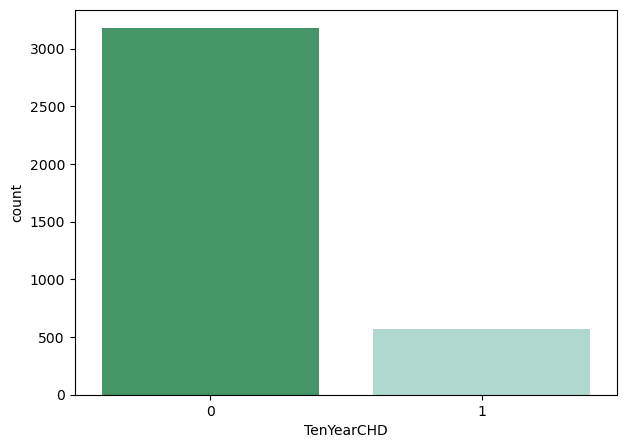

In [6]:
plt.figure(figsize = (7, 5))
sns.countplot(x = 'TenYearCHD', data = disease_df, palette = 'BuGn_r')
plt.show()

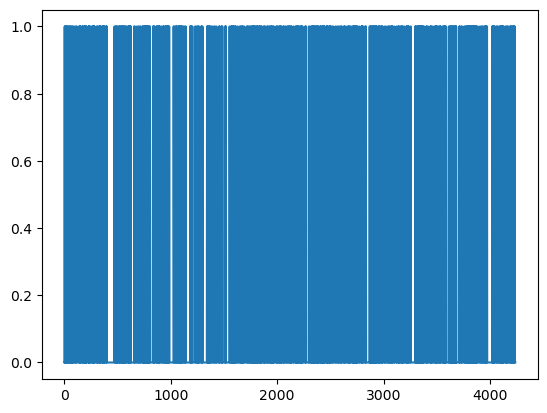

In [7]:
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', 
      accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8490230905861457


## Deep Learning Model

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
data = pd.read_csv("framingham.csv")

# Split features and target variable
X = data.drop(columns=['TenYearCHD'])
y = data['TenYearCHD']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy*100)


Epoch 1/50
96/96 [==============================] - 1s 4ms/step - loss: 0.6131 - accuracy: 0.8431 - val_loss: 0.5203 - val_accuracy: 0.8559
Epoch 2/50
96/96 [==============================] - 0s 3ms/step - loss: 0.4730 - accuracy: 0.8453 - val_loss: 0.4257 - val_accuracy: 0.8559
Epoch 3/50
96/96 [==============================] - 0s 3ms/step - loss: 0.4355 - accuracy: 0.8453 - val_loss: 0.4139 - val_accuracy: 0.8559
Epoch 4/50
96/96 [==============================] - 0s 3ms/step - loss: 0.4345 - accuracy: 0.8453 - val_loss: 0.4131 - val_accuracy: 0.8559
Epoch 5/50
96/96 [==============================] - 0s 3ms/step - loss: 0.4336 - accuracy: 0.8453 - val_loss: 0.4130 - val_accuracy: 0.8559
Epoch 6/50
96/96 [==============================] - 0s 3ms/step - loss: 0.4324 - accuracy: 0.8453 - val_loss: 0.4130 - val_accuracy: 0.8559
Epoch 7/50
96/96 [==============================] - 0s 3ms/step - loss: 0.4319 - accuracy: 0.8453 - val_loss: 0.4134 - val_accuracy: 0.8559
Epoch 8/50
96/96 [==

Epoch 1/50
96/96 [==============================] - 0s 4ms/step - loss: 0.4330 - accuracy: 0.8453 - val_loss: 0.4135 - val_accuracy: 0.8559
Epoch 2/50
96/96 [==============================] - 0s 3ms/step - loss: 0.4338 - accuracy: 0.8453 - val_loss: 0.4129 - val_accuracy: 0.8559
Epoch 3/50
96/96 [==============================] - 0s 3ms/step - loss: 0.4332 - accuracy: 0.8453 - val_loss: 0.4131 - val_accuracy: 0.8559
Epoch 4/50
96/96 [==============================] - 0s 3ms/step - loss: 0.4316 - accuracy: 0.8453 - val_loss: 0.4127 - val_accuracy: 0.8559
Epoch 5/50
96/96 [==============================] - 0s 3ms/step - loss: 0.4317 - accuracy: 0.8453 - val_loss: 0.4131 - val_accuracy: 0.8559
Epoch 6/50
96/96 [==============================] - 0s 3ms/step - loss: 0.4324 - accuracy: 0.8453 - val_loss: 0.4129 - val_accuracy: 0.8559
Epoch 7/50
96/96 [==============================] - 0s 3ms/step - loss: 0.4318 - accuracy: 0.8453 - val_loss: 0.4127 - val_accuracy: 0.8559
Epoch 8/50
96/96 [==

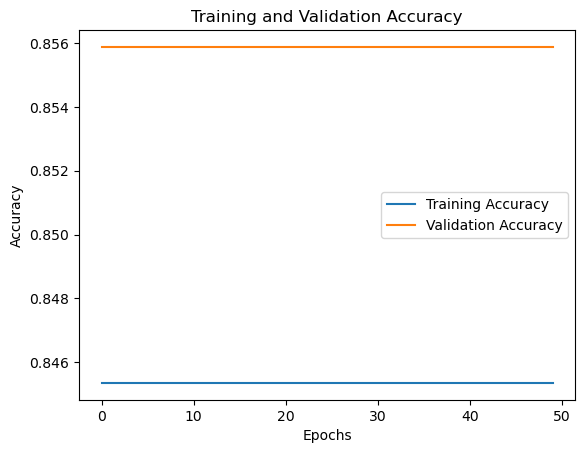

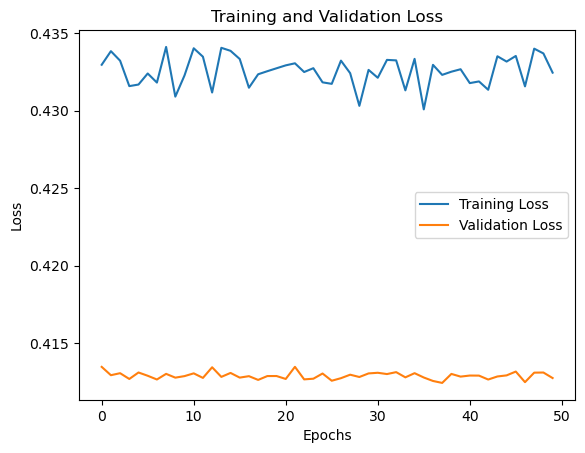

In [36]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Classification Report and Confusion Matrix

In [39]:
from sklearn.metrics import classification_report

# Predict the classes
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

27/27 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       725
           1       0.00      0.00      0.00       123

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.73      0.85      0.79       848



c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


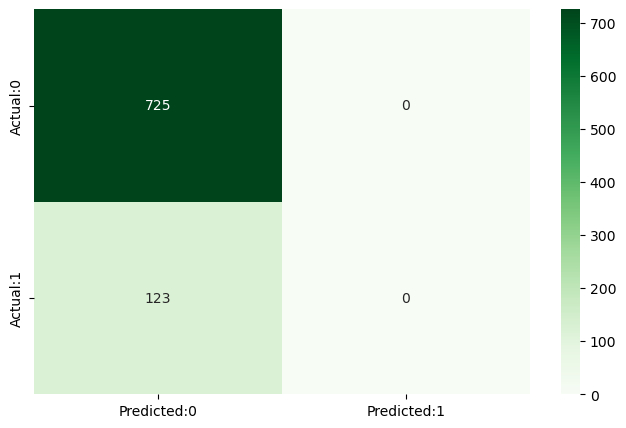

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       725
           1       0.00      0.00      0.00       123

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.73      0.85      0.79       848



c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))